In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Polynomial function

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

### Test polynomial function

In [6]:
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed
print polynomial_dataframe(tmp, 3)


0    1
1    2
2    3
dtype: float64
0     1
1     8
2    27
dtype: float64
   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


# Load data

In [9]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/Users/ajkale/projects/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [10]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [16]:
#model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

regr = LinearRegression()
# Train the model using the training sets
model1 = regr.fit(poly1_data['power_1'].reshape(-1, 1), poly1_data['price']) # reshape is used as fit does not take single feature

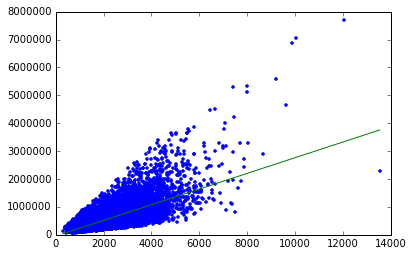

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data['power_1'].reshape(-1, 1)),'-')

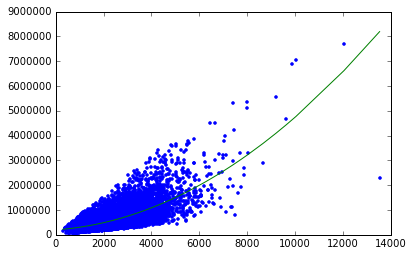

In [88]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
features = ['power_1', 'power_2']
regr = LinearRegression()
model2 = regr.fit(poly2_data[features], poly2_data['price']) 
plt.plot(poly2_data['power_1'], poly2_data['price'],'.',
poly2_data['power_1'], model2.predict(poly2_data[features]),'-')

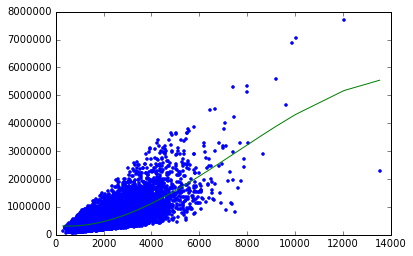

In [89]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
features = ['power_1', 'power_2', 'power_3']
regr = LinearRegression()
model3 = regr.fit(poly3_data[features], poly3_data['price']) 
plt.plot(poly3_data['power_1'], poly3_data['price'],'.',
poly3_data['power_1'], model3.predict(poly3_data[features]),'-')

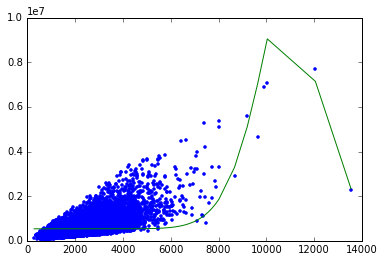

In [90]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
features = poly15_data.columns
poly15_data['price'] = sales['price']
#features = ['power_1', 'power_2', 'power_3']
regr = LinearRegression()
model15 = regr.fit(poly15_data[features], poly15_data['price']) 
plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
poly15_data['power_1'], model15.predict(poly15_data[features]),'-')

# Changing the data and re-learning

In [91]:
from sklearn.cross_validation import train_test_split
X_1, X_2, y_1, y_2 = train_test_split(sales['sqft_living'], sales['price'], test_size=0.5, random_state=0)
setX_1, setX_2, sety_1, sety_2 = train_test_split(X_1, y_1, test_size=0.5, random_state=0)
setX_3, setX_4, sety_3, sety_4 = train_test_split(X_2, y_2, test_size=0.5, random_state=0)

In [92]:
def fit_15_deg_poly(X, y):
    poly15_data = polynomial_dataframe(X, 15)
    regr = LinearRegression()
    return regr.fit(poly15_data, y) 

def plot_fit(model, X, y):
    plt.plot(X['power_1'], y,'.',
    X['power_1'], model.predict(X[features]),'-')

In [93]:
model15_1 = fit_15_deg_poly(setX_1, sety_1)
model15_2 = fit_15_deg_poly(setX_2, sety_2)
model15_3 = fit_15_deg_poly(setX_3, sety_3)
model15_4 = fit_15_deg_poly(setX_4, sety_4)

In [94]:
print 'Coefficients for set1 fit: ', model15_1.coef_
print 'Coefficients for set2 fit: ', model15_2.coef_
print 'Coefficients for set3 fit: ', model15_3.coef_
print 'Coefficients for set4 fit: ', model15_4.coef_

Coefficients for set1 fit:  [  1.58865995e-77  -1.33316640e-38  -2.30731259e-44  -1.67637089e-49
  -2.50591994e-55  -4.21622230e-57   2.59701904e-55   1.10184177e-51
   4.33504537e-48   1.51270815e-44   4.27719982e-41   7.65007191e-38
  -2.83636200e-41   3.48479413e-45  -1.41666032e-49]
Coefficients for set2 fit:  [  2.05727194e-77  -1.49121198e-39   4.14731653e-45   3.03488229e-49
  -7.94102918e-54  -1.28948016e-57   3.09843639e-55   1.29714324e-51
   5.03053005e-48   1.72813138e-44   4.80335165e-41   8.43139301e-38
  -3.27113265e-41   4.22392011e-45  -1.81369823e-49]
Coefficients for set3 fit:  [  2.91296634e-91   8.12806982e-50  -2.89926614e-56  -2.30469181e-61
   9.83879079e-75   1.98665158e-71   1.72338793e-67   1.45618391e-63
   1.18181701e-59   9.01758248e-56   6.23236266e-52   3.61015489e-48
   1.40147071e-44  -2.15331334e-48   8.26074981e-53]
Coefficients for set4 fit:  [  1.46320107e-78   9.03954826e-40  -3.05092633e-45  -1.35583882e-49
   7.52971204e-55  -8.87466002e-58   4.

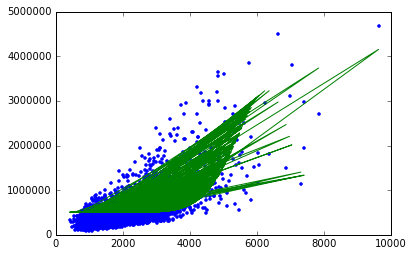

In [95]:
plot_fit(model15_1, polynomial_dataframe(setX_1, 15), sety_1)

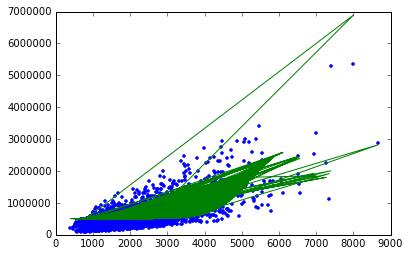

In [96]:
plot_fit(model15_2, polynomial_dataframe(setX_2, 15), sety_2)

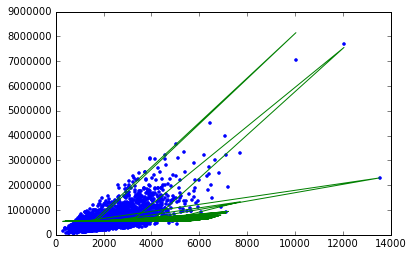

In [97]:
plot_fit(model15_3, polynomial_dataframe(setX_3, 15), sety_3)

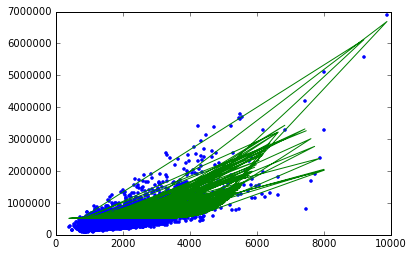

In [98]:
plot_fit(model15_4, polynomial_dataframe(setX_4, 15), sety_4)

In [99]:
model15_4.coef_

array([  1.46320107e-78,   9.03954826e-40,  -3.05092633e-45,
        -1.35583882e-49,   7.52971204e-55,  -8.87466002e-58,
         4.38916866e-56,   2.07990921e-52,   9.13165182e-49,
         3.55140064e-45,   1.11750999e-41,   2.22074008e-38,
        -7.43915767e-42,   8.28927494e-46,  -3.07084958e-50])

In [100]:
model15_3.coef_

array([  2.91296634e-91,   8.12806982e-50,  -2.89926614e-56,
        -2.30469181e-61,   9.83879079e-75,   1.98665158e-71,
         1.72338793e-67,   1.45618391e-63,   1.18181701e-59,
         9.01758248e-56,   6.23236266e-52,   3.61015489e-48,
         1.40147071e-44,  -2.15331334e-48,   8.26074981e-53])

In [102]:
print 'Intercept for set1 fit: ', model15_1.intercept_
print 'Intercept for set2 fit: ', model15_2.intercept_
print 'Intercept for set3 fit: ', model15_3.intercept_
print 'Intercept for set4 fit: ', model15_4.intercept_

Intercept for set1 fit:  506384.994893
Intercept for set2 fit:  508330.113906
Intercept for set3 fit:  541469.962748
Intercept for set4 fit:  516076.024716


# Selecting a Polynomial Degree

In [103]:
train_val_X, test_X, train_val_y, test_y = train_test_split(sales['sqft_living'], sales['price'], test_size=0.1, random_state=1)
train_X, validation_X, train_y, validation_y = train_test_split(train_val_X, train_val_y, test_size=0.5, random_state=1)

In [112]:
train_data = [None] * 16
train_data[0] = pd.DataFrame()
for i in range(1, 16):
    train_data[i] = polynomial_dataframe(train_X, i)
    


In [128]:
power = range(0, 16)
train_data = map(lambda x: polynomial_dataframe(train_X, x), power)
validation_data = map(lambda x: polynomial_dataframe(validation_X, x), power)

In [166]:
def train_linear_model(train_X, train_y, validation_X, validation_y):
    regr = LinearRegression()
    regr.fit(train_X, train_y)
#     print('Intercept: \n', regr.intercept_)
#     print('Coefficients: \n', regr.coef_)
#     print("Residual sum of squares on TRAIN: %.2f"
#           % np.mean((regr.predict(train_X) - train_y) ** 2))
    print("Residual sum of squares on VALIDATION: %2.2e"
          % ((regr.predict(validation_X) - validation_y) ** 2).sum())
    

In [167]:
for i in power:
    print 'Power : ', i
    train_linear_model(train_data[i], train_y, validation_data[i], validation_y)

Power :  0
Residual sum of squares on VALIDATION: 6.89e+14
Power :  1
Residual sum of squares on VALIDATION: 6.89e+14
Power :  2
Residual sum of squares on VALIDATION: 6.23e+14
Power :  3
Residual sum of squares on VALIDATION: 6.26e+14
Power :  4
Residual sum of squares on VALIDATION: 6.19e+14
Power :  5
Residual sum of squares on VALIDATION: 6.12e+14
Power :  6
Residual sum of squares on VALIDATION: 6.04e+14
Power :  7
Residual sum of squares on VALIDATION: 6.63e+14
Power :  8
Residual sum of squares on VALIDATION: 1.03e+15
Power :  9
Residual sum of squares on VALIDATION: 2.32e+15
Power :  10
Residual sum of squares on VALIDATION: 6.00e+15
Power :  11
Residual sum of squares on VALIDATION: 1.52e+16
Power :  12
Residual sum of squares on VALIDATION: 3.99e+15
Power :  13
Residual sum of squares on VALIDATION: 6.99e+15
Power :  14
Residual sum of squares on VALIDATION: 1.31e+16
Power :  15
Residual sum of squares on VALIDATION: 2.55e+16


In [168]:
train_linear_model(train_data[6], train_y, polynomial_dataframe(test_X, 6), test_y)

Residual sum of squares on VALIDATION: 1.43e+14
